# Неделя 4
*   [Полный User Guide по библиотеке pandas](https://pandas.pydata.org/docs/user_guide/index.html)
*   [Куча полезных рецептов и хороших практик](https://pandas.pydata.org/docs/user_guide/cookbook.html)

Данные iris.csv можно скачать отсюда https://drive.google.com/file/d/1fjyopp9FZ-g6KIsIE8vPX2r62A43h2XI/view?usp=sharing

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris.csv


In [ ]:
import pandas as pd
import numpy as np

## Pandas
В pandas существует два основных объекта: pandas Series и pandas DataFrame. Первая это по сути асбтракция над одномерным массивом данных с дополнительными метаданными, а вторая абстракция это по сути "таблица", состоящая из наборов pandas Series.

### Создание объекта
Начнем с pd.Series. Также, как и для numpy массива мы можем задать тип данных. Доступны все те же типы данных, что и в numpy + есть возможность конвертировать одни типы данных в другие с помощью astype + можно указывать [свои функции](https://pbpython.com/pandas_dtypes.html) для преобразования.

In [ ]:
s = pd.Series([1,2,3], dtype=np.int32, name='numbers') # pd.Series
s

0    1
1    2
2    3
Name: numbers, dtype: int32

Обратите внимание на колонку слева, это индекс, и если не указано обратное, он создается автоматически. Индексы мы будем встречать как для pd.Series, так и для pd.DataFrame. Что же он дает? Аналогия здесь такая же, что с телефонным справочником. Индексы позволяют более логично категоризовать информацию, а также более оптимально делать некоторые операции над сериями (pd.Series) и датафреймами (pd.DataFrame). Вкратце, можно отметить, что индексы
1. Идентифицируют данные (т.е. предоставляют метаданные) с помощью известных индикаторов, важных для анализа, визуализации и отображения в интерактивной консоли
2. Включают автоматическое и явное выравнивание данных.
3. Позволяют интуитивно получать и настраивать подмножества набора данных.

Помимо этого обратите внимание, что у серии также есть имя. Это полезно, когда нам нужно вставить новую колонку в DataFrame без явного указания имени.

Следующим образом мы можем задать произвольный индекс, теперь наши записи идентифицируют буквы a b c

In [ ]:
s = pd.Series([1,2,3], dtype=np.int32, name='numbers', index=['a', 'b', 'c'])
s

a    1
b    2
c    3
Name: numbers, dtype: int32

Помимо индекса (свойства s.index) также сохраняется сквозняется целочисленная индексация.

Ниже выборка просто по целочисленному индексу (сквозному), как будто мы работаем с обычным списком

In [ ]:
s[0] # 

1

Метод доступа .loc позволяет делать выборку именно по индексу.
Обратите внимание, что здесь используются именно квадратные скобки. Скорее всего так сделано, чтобы такая выборка была похоже на выборку из обычного списка.

In [ ]:
s.loc['b']

2

Посмотреть отдельно на индекс можно с помощью свойства .index

In [ ]:
s.index

Index(['a', 'b', 'c'], dtype='object')

Создадим pandas DataFrame из случайной numpy матрицы

In [ ]:
m = np.random.rand(5,3)
df = pd.DataFrame(m)
df

,0,1,2
0,0.826560,0.606992,0.046158
1,0.128247,0.478177,0.378184
2,0.921544,0.402228,0.845925
3,0.669504,0.813911,0.717915
4,0.647280,0.753927,0.802768


Мы видим строковый индекс, который был создан автоматически, а также колоночный (или просто колонки), которые также были заданы автоматически. У нас получился не совсем привычный вид таблицы, давайте зададим колонкам более понятные имена.

In [ ]:
df = pd.DataFrame(data=m, columns=['first', 'second', 'third'],)
df

,first,second,third
0,0.826560,0.606992,0.046158
1,0.128247,0.478177,0.378184
2,0.921544,0.402228,0.845925
3,0.669504,0.813911,0.717915
4,0.647280,0.753927,0.802768


В pandas DataFrame выборка квадратными скобками происходит по колонкам

In [ ]:
df['first']

0    0.379692
1    0.553500
2    0.379066
3    0.435112
4    0.275009
Name: first, dtype: float64

In [ ]:
df[0] # такой колонки нет, будет ошибка

KeyError: ignored

Но ВНЕЗАПНО, если мы попробуем применить слайсинг как в обычных массивах numpy или списках, выборка будет происходить по строкам. Эта та особенность, которую мы вынуждены просто запомнить. Выборка при этом происходит по целочисленной сквозной индексации (0,1,2,3,4,...).

In [ ]:
df[:2]

,first,second,third
0,0.826560,0.606992,0.046158
1,0.128247,0.478177,0.378184


Есть удобный способ инициализировать новый DataFrame с помощью словаря. Ключи станут названиями колонок, а значения по ключам столбцами.

In [ ]:
# pd.DataFrame через словарь
d = {
    'name': ['Dmitry', 'Alexey', 'Vladimir', 'Elena'],
    'age': [24, 25, 30, 40]
}
pd.DataFrame(d)

,name,age
0,Dmitry,24
1,Alexey,25
2,Vladimir,30
3,Elena,40


### Просмотр 

По умолчанию colab notebook (или jupyter notebook) будет "обрезать" отображение табличек, так как если там много строк, они могут занимать много места, и привести ваш браузер в замешательство, а компьютер в полный аут.

In [ ]:
df

,first,second,third
0,0.379692,0.641827,0.763283
1,0.553500,0.453616,0.892010
2,0.379066,0.308578,0.669392
3,0.435112,0.179256,0.506263
4,0.275009,0.878521,0.382510


In [ ]:
pd.DataFrame(np.random.rand(100,2)) # так будет пропущено несколько строчек в целях экономии места

,0,1
0,0.827194,0.141254
1,0.964985,0.029540
2,0.551814,0.922230
3,0.789391,0.391745
4,0.959257,0.072854
...,...,...
95,0.378144,0.088427
96,0.979382,0.776132
97,0.632351,0.867668
98,0.958864,0.450978


Впрочем, вряд ли вам понадобится отсматривать, скажем, 100000 строк какой-нибудь таблицы вручную. Как правило, нам достаточно посмотреть первые несколько строк таблицы, чтобы понять что там находится, и правильно ли мы прочитали нашу таблицу из файла.

In [ ]:
df.head(2) # покажем первые две строки датафрейма

,first,second,third
0,0.379692,0.641827,0.763283
1,0.553500,0.453616,0.892010


In [ ]:
df.tail(2) # последние две строчки с конца

,first,second,third
3,0.435112,0.179256,0.506263
4,0.275009,0.878521,0.382510


Мы можем отдельно посмотреть строковый индекс и колонки с помощью соответствующих свойств объекта

In [ ]:
df.index

RangeIndex(start=0, stop=5, step=1)

In [ ]:
df.columns

Index(['first', 'second', 'third'], dtype='object')

In [ ]:
df.columns[1]

'second'

Узнать форму нашей таблицы

In [ ]:
df.shape

(5, 3)

In [ ]:
df.shape[0]

5

In [ ]:
df.shape[1]

3

Посмотреть типы данных

In [ ]:
df.dtypes

first     float64
second    float64
third     float64
dtype: object

И менять их с помощью метода astype. Обратите внимание, что мы можем передать целый словарь в котором ключи это названия колонок, а значения по ключу это тип данных к которому мы хотим преобразовать соответствующую колонку.

In [ ]:
df.astype({'first': np.float32}).dtypes

first     float32
second    float64
third     float64
dtype: object

Мы можем отказаться от всех метаданных и перейти к numpy матрице, чтобы работать с ней с помощью методов из библиотеки numpy

In [ ]:
df.to_numpy()

array([[0.37969151, 0.64182666, 0.76328264],
       [0.55349974, 0.4536163 , 0.89200988],
       [0.37906648, 0.30857808, 0.66939211],
       [0.43511226, 0.17925616, 0.50626252],
       [0.27500895, 0.87852117, 0.38251001]])

Крайне полезен метод .describe(), который выводит нам дескриптивную статистику по нашему датафрейму.

In [ ]:
df.describe()

,first,second,third
count,5.000000,5.000000,5.000000
mean,0.404476,0.492360,0.642691
std,0.101450,0.276031,0.202313
min,0.275009,0.179256,0.382510
25%,0.379066,0.308578,0.506263
50%,0.379692,0.453616,0.669392
75%,0.435112,0.641827,0.763283
max,0.553500,0.878521,0.892010


А в методе info мы можем сразу проверить наличие пропусков (графа Non-Null Count), а также посмотреть какой объем памяти занимает наша табличка (чем меньше, тем, конечно, лучше).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   first   5 non-null      float64
 1   second  5 non-null      float64
 2   third   5 non-null      float64
dtypes: float64(3)
memory usage: 248.0 bytes


In [ ]:
df.astype({'first': np.float32}).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   first   5 non-null      float32
 1   second  5 non-null      float64
 2   third   5 non-null      float64
dtypes: float32(1), float64(2)
memory usage: 228.0 bytes


По большому счету колонки это тот же индекс, только по горизонтальной оси (axis = 1). Строковый и столбцовый индексы могут заменять друг друга, давайте продемонстрируем это с помощью операции транспонирования.

Кстати, ниже напоминание об осях из прошлой лекции.

![axes](https://railsware.com/blog/wp-content/uploads/2018/11/data-frame-axes.png)

![axes](https://i.stack.imgur.com/FzimB.png)

In [ ]:
df.T

,0,1,2,3,4
first,0.379692,0.553500,0.379066,0.435112,0.275009
second,0.641827,0.453616,0.308578,0.179256,0.878521
third,0.763283,0.892010,0.669392,0.506263,0.382510


Мы можем сортировать строки таблицы по значениям колонок. Обратите внимание, что индекс остался прежним.

In [ ]:
df.sort_values('first', ascending=False) # ascending=False по убыванию

,first,second,third
1,0.553500,0.453616,0.892010
3,0.435112,0.179256,0.506263
0,0.379692,0.641827,0.763283
2,0.379066,0.308578,0.669392
4,0.275009,0.878521,0.382510


А можем сортировать именно индекс.

In [ ]:
df.T.sort_index(axis=0, ascending=False)

,0,1,2,3,4
third,0.763283,0.892010,0.669392,0.506263,0.382510
second,0.641827,0.453616,0.308578,0.179256,0.878521
first,0.379692,0.553500,0.379066,0.435112,0.275009


### Выборка
Подробная информация по выборкам данных представлена [тут](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html).

#### Квадратные скобки
Как уже отмечалось выше, для датафреймов выборка происходит по столбцам.

In [ ]:
df['third']

0    0.763283
1    0.892010
2    0.669392
3    0.506263
4    0.382510
Name: third, dtype: float64

In [ ]:
df[['third', 'first']]

,third,first
0,0.763283,0.379692
1,0.892010,0.553500
2,0.669392,0.379066
3,0.506263,0.435112
4,0.382510,0.275009


In [ ]:
df[1:4] # слайсинг по сквозному целочисленному индексу как в массиве

,first,second,third
1,0.553500,0.453616,0.892010
2,0.379066,0.308578,0.669392
3,0.435112,0.179256,0.506263


#### Выборка по метке (лейблу)
Добавим новый столбец в нашу таблицу и сделаем его новым индексом с помощью метода .set_index()

In [ ]:
df['new_index'] = pd.Series(['a', 'b', 'e', 'c', 'g'])
df

,first,second,third,new_index
0,0.434850,0.331159,0.386165,a
1,0.726613,0.231609,0.472886,b
2,0.286445,0.235704,0.081039,e
3,0.090312,0.872867,0.521625,c
4,0.278950,0.613056,0.548749,g


In [ ]:
df = df.set_index('new_index')
df

,first,second,third
new_index,,,
a,0.434850,0.331159,0.386165
b,0.726613,0.231609,0.472886
e,0.286445,0.235704,0.081039
c,0.090312,0.872867,0.521625
g,0.278950,0.613056,0.548749


Теперь с помощью .loc мы можем производить навигацию по этому индексу

In [ ]:
df.loc['b']

first     0.553500
second    0.453616
third     0.892010
Name: b, dtype: float64

И даже использовать диапазоны (слайсы) по индексу

In [ ]:
df.loc['b':'c']

,first,second,third
new_index,,,
b,0.553500,0.453616,0.892010
e,0.379066,0.308578,0.669392
c,0.435112,0.179256,0.506263


Через запятую мы можем указать также и фильтр по столбцам

In [ ]:
df.loc['b':'c', ['second', 'third']]

,second,third
new_index,,
b,0.231609,0.472886
e,0.235704,0.081039
c,0.872867,0.521625


#### Выборка по позиции в таблице
Сохраняется сквозная целочисленная индексация, и она доступна с помощью метода .iloc. Скобки также квадратные

In [ ]:
df

,first,second,third
new_index,,,
a,0.379692,0.641827,0.763283
b,0.553500,0.453616,0.892010
e,0.379066,0.308578,0.669392
c,0.435112,0.179256,0.506263
g,0.275009,0.878521,0.382510


In [ ]:
df.iloc[1:3]

,first,second,third
new_index,,,
b,0.553500,0.453616,0.892010
e,0.379066,0.308578,0.669392


Происходит выборка именно по **номеру** строки и **номеру** столбца (начиная с нуля)

In [ ]:
df.iloc[1:3, [0,2]]

,first,third
new_index,,
b,0.726613,0.472886
e,0.286445,0.081039


### Чтение и запись данных

В pandas присутствует огромное кол-во возможностей для чтения записи данных.

Например, в методе pd.read_csv доступны специфичные опции для формата (например, разделитель колонок sep), но и также можно, например, дополнить список значений, которые pandas по умолчанию считает пропусками, задав явно параметр na_values.

Более подробную информацию про чтение запись данных можно найти [здесь](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html)

In [ ]:
iris = pd.read_csv('iris.csv', header='infer', sep=',')
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
pd.read_ # доступно очень большое кол-во форматов для чтения

In [ ]:
# запись to_csv() и другие

In [ ]:
iris.to_csv('iris_test.csv', header=True, index=False) # сохраняем в качестве первой строки список колонок, первой колонкой индекс НЕ пишем

In [ ]:
!ls

iris.csv  iris_test.csv  sample_data


Загрузим набор данных iris.csv, и потренируемся делать выборки на нем.

In [ ]:
import numpy as np
import pandas as pd

iris = pd.read_csv('iris.csv', header='infer')
iris.head(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


##### Задачи на выборку данных
1. выведите первые 4 строки и первые 2 столбца с помощью метода .iloc
2. выведите только колонки sepal.length и petal.length с помощью loc и/или квадратных скобок
3. сделайте индексом колонку variety с помощью метода .set_index(), и выберите с помощью .loc только вид 'Setosa'

In [ ]:
iris.iloc[:4, :2] # 1.

,sepal.length,sepal.width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1


In [ ]:
iris.loc[:, ['sepal.length', 'petal.length']] # 2.

,sepal.length,petal.length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


In [ ]:
iris.set_index('variety').loc['Setosa'] # 3. 

,sepal.length,sepal.width,petal.length,petal.width
variety,,,,
Setosa,5.1,3.5,1.4,0.2
Setosa,4.9,3.0,1.4,0.2
Setosa,4.7,3.2,1.3,0.2
Setosa,4.6,3.1,1.5,0.2
Setosa,5.0,3.6,1.4,0.2
Setosa,5.4,3.9,1.7,0.4
Setosa,4.6,3.4,1.4,0.3
Setosa,5.0,3.4,1.5,0.2
Setosa,4.4,2.9,1.4,0.2


#### Выборка по маске
Также как и в numpy присутствует возможность делать выборки по маске. Но здесь механизм несколько отличается. Если в numpy мы получали матрицу из True и False, и у каждому элементу было сопоставлено значение True (брать в выборку) или False (не брать в выборку), то в pandas маска это pandas Series **с такой же индексацией** что и исходный датафрейм или серия, состоящий из значений True или False. Т.е мы указываем какие строчки идут в результирующую выборку, а какие нет.

In [ ]:
# получаем маску в которой у каждого индекса (!!!) указано оставлять его в наборе данных или нет
(iris['sepal.length'] > 5.0) & (iris['sepal.width'] <= 3.0)

0      False
1      False
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148    False
149     True
Length: 150, dtype: bool

Конечно, мы можем выстраивать условия в логические цепочки

In [ ]:
iris[(iris['sepal.length'] > 5.0) & (iris['sepal.width'] <= 3.0)]

,sepal.length,sepal.width,petal.length,petal.width,variety
53,5.5,2.3,4.0,1.3,Versicolor
54,6.5,2.8,4.6,1.5,Versicolor
55,5.7,2.8,4.5,1.3,Versicolor
58,6.6,2.9,4.6,1.3,Versicolor
59,5.2,2.7,3.9,1.4,Versicolor
...,...,...,...,...,...
142,5.8,2.7,5.1,1.9,Virginica
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica


Мы можем даже перемешать значения, но выборка все равно останется той же за счет соответствия по индексу!

In [ ]:
iris.sort_values('sepal.length')[(iris['sepal.length'] > 5.0) & (iris['sepal.width'] <= 3.0)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,sepal.length,sepal.width,petal.length,petal.width,variety
98,5.1,2.5,3.0,1.1,Versicolor
59,5.2,2.7,3.9,1.4,Versicolor
84,5.4,3.0,4.5,1.5,Versicolor
90,5.5,2.6,4.4,1.2,Versicolor
53,5.5,2.3,4.0,1.3,Versicolor
...,...,...,...,...,...
130,7.4,2.8,6.1,1.9,Virginica
105,7.6,3.0,6.6,2.1,Virginica
122,7.7,2.8,6.7,2.0,Virginica
118,7.7,2.6,6.9,2.3,Virginica


In [ ]:
# получим уникальные значения индексов в каждой выборке
# если множество ключей в первом случае совпадает со множеством во втором случае, то 
# в обоих случаях мы сделали одинаковую выборку
set(iris[(iris['sepal.length'] > 5.0) & (iris['sepal.width'] <= 3.0)].index) \
 - set(iris.sort_values('sepal.length')[(iris['sepal.length'] > 5.0) & (iris['sepal.width'] <= 3.0)].index)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


set()

Для того, чтобы сделать фильтрацию по значениям в колонке, используйте метод .isin()

In [ ]:
iris['variety'].isin(['Setosa', 'Virginica']) # проверка по множеству

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: sepal.length, Length: 150, dtype: bool

#### Вставка значений
Вставку значений можно производить методами доступа .loc и .iloc, а также методом .at. Разница в том, что .loc и .iloc чуть более универсальны, и позволяют изменить сразу целый диапазон, при этом важно соблюсти размерности вставляемых данных. .at в свою очередь дает нам точечную вставку "на место", и лучше подходит с точки зрения чтения кода.

In [ ]:
df = pd.DataFrame(np.random.rand(6,3), 
                  index=['a','b','c','d','e','f'], 
                  columns=['first', 'second', 'third'])
df

,first,second,third
a,0.845152,0.384299,0.089012
b,0.581960,0.323776,0.045295
c,0.181871,0.372784,0.365997
d,0.064578,0.435754,0.118551
e,0.800549,0.805160,0.150216
f,0.371478,0.318323,0.975843


In [ ]:
df.loc['b','first'] = 1.0
df

,first,second,third
a,0.845152,0.384299,0.089012
b,1.000000,0.323776,0.045295
c,0.181871,0.372784,0.365997
d,0.064578,0.435754,0.118551
e,0.800549,0.805160,0.150216
f,0.371478,0.318323,0.975843


In [ ]:
df.loc['a':'c', 'first'] = [0.5, 1.5, 2.0]
df

,first,second,third
a,0.500000,0.384299,0.089012
b,1.500000,0.323776,0.045295
c,2.000000,0.372784,0.365997
d,0.064578,0.435754,0.118551
e,0.800549,0.805160,0.150216
f,0.371478,0.318323,0.975843


In [ ]:
df.at['e', 'second'] = 100
df

,first,second,third
a,0.500000,0.384299,0.089012
b,1.500000,0.323776,0.045295
c,2.000000,0.372784,0.365997
d,0.064578,0.435754,0.118551
e,0.800549,100.000000,0.150216
f,0.371478,0.318323,0.975843


### Пропущенные значения
По умолчанию не участвуют в вычислениях, и чаще всего на месте пропусков можно встретить значение np.nan (Not a Number), либо None (для нечисловых типов)

In [ ]:
# сделаем специально несколько пропущенных значений
df.at['e', 'second'] = np.nan
df.at['e', 'third'] = np.nan
df

,first,second,third
a,0.500000,0.384299,0.089012
b,1.500000,0.323776,0.045295
c,2.000000,0.372784,0.365997
d,0.064578,0.435754,0.118551
e,0.800549,NaN,NaN
f,0.371478,0.318323,0.975843


Метод .isna() возвращает нам карту с пропусками. Пропуск там, где значение True.

In [ ]:
df.isna()

,first,second,third
a,False,False,False
b,False,False,False
c,False,False,False
d,False,False,False
e,False,True,True
f,False,False,False


Напоминаю, что в принципе количественную информацию о пропусках можно получить с помощью метода .info()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, a to f
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   first   6 non-null      float64
 1   second  5 non-null      float64
 2   third   5 non-null      float64
dtypes: float64(3)
memory usage: 352.0+ bytes


Для удаления пропусков используется метод .dropna().

По умолчанию .dropna() удалит те строки в которых есть хотя бы один пропуск в строке.

In [ ]:
df.dropna()

,first,second,third
a,0.500000,0.384299,0.089012
b,1.500000,0.323776,0.045295
c,2.000000,0.372784,0.365997
d,0.064578,0.435754,0.118551
f,0.371478,0.318323,0.975843


А с помощью транспонирования можно удалять целые столбцы

In [ ]:
df.T.dropna().T

,first
a,0.500000
b,1.500000
c,2.000000
d,0.064578
e,0.800549
f,0.371478


Или использовать параметр axis=1

In [ ]:
df.dropna(axis=1)

,first
a,0.500000
b,1.500000
c,2.000000
d,0.064578
e,0.800549
f,0.371478


Но все же часто нам все-таки интересны данные с пропусками. Для работы с ними можно использовать метод .fillna()

Вот так мы заполним все пропуски одним и тем же значением

In [ ]:
df.fillna(0)

,first,second,third
a,0.500000,0.384299,0.089012
b,1.500000,0.323776,0.045295
c,2.000000,0.372784,0.365997
d,0.064578,0.435754,0.118551
e,0.800549,0.000000,0.000000
f,0.371478,0.318323,0.975843


Но обычно мы все же хотим заполнять разные столбцы разными значениями

In [ ]:
df.fillna({'second': 0, 'third': 1.0})

,first,second,third
a,0.500000,0.384299,0.089012
b,1.500000,0.323776,0.045295
c,2.000000,0.372784,0.365997
d,0.064578,0.435754,0.118551
e,0.800549,0.000000,1.000000
f,0.371478,0.318323,0.975843


Есть и более продвинутые методы заполнения, сделаем несколько пропусков подряд

In [ ]:
df.at['d', 'second'] = np.nan
df.at['d', 'third'] = np.nan
df

,first,second,third
a,0.500000,0.384299,0.089012
b,1.500000,0.323776,0.045295
c,2.000000,0.372784,0.365997
d,0.064578,NaN,NaN
e,0.800549,NaN,NaN
f,0.371478,0.318323,0.975843


Метод bfill заполняет серию пропусков последним корректным (non Null) значением, итерируясь по таблице с конца.

In [ ]:
df.fillna(method='bfill')

,first,second,third
a,0.500000,0.384299,0.089012
b,1.500000,0.323776,0.045295
c,2.000000,0.372784,0.365997
d,0.064578,0.318323,0.975843
e,0.800549,0.318323,0.975843
f,0.371478,0.318323,0.975843


Метод ffill делает то же самое, но итерация происходит с начала таблицы

In [ ]:
df.fillna(method='ffill')

,first,second,third
a,0.500000,0.384299,0.089012
b,1.500000,0.323776,0.045295
c,2.000000,0.372784,0.365997
d,0.064578,0.372784,0.365997
e,0.800549,0.372784,0.365997
f,0.371478,0.318323,0.975843


bfill и ffill особенно полезны при заполнении пропусков во временном ряду. Более подробно данный функционал описан [здесь](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html).

[Интерполяция](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html), увы делается отдельными методами.

### Статистики
Конечно, в pandas реализовано куча методов для подсчета различных статистик. 
Полный список методов можно посмотреть [здесь](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#computations-descriptive-stats) 

In [ ]:
# mean, std, var, value_counts, df +- series

Вот так мы можем посчитать средние значения для всех колонок сразу

In [ ]:
df.mean()

first     0.872768
second    0.349796
third     0.369037
dtype: float64

А так посчитать среднее лишь для одной колонки

In [ ]:
df['first'].mean()

0.8727675477330439

То же для [стандартного отклонения](https://berg.com.ua/indicators-overlays/stdev/#:~:text=%D0%A1%D1%82%D0%B0%D0%BD%D0%B4%D0%B0%D1%80%D1%82%D0%BD%D0%BE%D0%B5%20%D0%BE%D1%82%D0%BA%D0%BB%D0%BE%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%BC%D0%BE%D0%B6%D0%BD%D0%BE%20%D0%B2%D1%8B%D1%80%D0%B0%D0%B7%D0%B8%D1%82%D1%8C%20%D1%84%D0%BE%D1%80%D0%BC%D1%83%D0%BB%D0%BE%D0%B9,%D0%BD%D0%B0%20%D0%BA%D0%BE%D0%BB%D0%B8%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%BE%20%D1%8D%D0%BB%D0%B5%D0%BC%D0%B5%D0%BD%D1%82%D0%BE%D0%B2%20%D0%B2%20%D0%B2%D1%8B%D0%B1%D0%BE%D1%80%D0%BA%D0%B5.)

In [ ]:
df.std() # стандартное

first     0.736574
second    0.033598
third     0.428736
dtype: float64

Или [дисперсии](https://ru.qwe.wiki/wiki/Variance)

In [ ]:
df.var() # дисперсию

first     0.542541
second    0.001129
third     0.183815
dtype: float64

А с помощью .value_counts() можно посчитать кол-во вхождений уникальных значений

In [ ]:
df['second'].value_counts()

0.318323    1
0.323776    1
0.372784    1
0.384299    1
Name: second, dtype: int64

### Применение функций к данным (apply)
И все же иногда в pandas требуются новые функции со своей логикой обработки. Тогда на помощью приходит метод .apply

Он работает следующим образом. Мы передаем первым аргументом функцию, которая отвечает за логику, а вторым передаем axis, т.е мы указываем производить обработку по колонкам или по строкам.

В самой функции, задающей логику, нужно не забыть вернуть строку или столбец обратно в таблицу (return).

Полное описание функции доступно [тут](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html)

In [ ]:
def my_function(r): 
  r['first'] = r['first']**2
  r['second'] = r['second'] - 1
  return r

print("begin")
df.apply(my_function, axis=1) # тогда в my_function будут отправляться строки, в параметр r
# for *итерация по строчкам*
#.  применить к строке функцию my_function и перезаписать строчку

begin


,first,second,third
a,0.000015,-3.615701,0.089012
b,5.062500,-1.676224,0.045295
c,16.000000,-1.627216,0.365997
d,0.000017,NaN,NaN
e,0.410725,NaN,NaN
f,0.019043,-1.681677,0.975843


In [ ]:
def my_function(c):
  if c.name == 'first':
    c = c**2
  if c.name == 'second':
    c = c - 1
  return c

print("begin")
df.apply(my_function, axis=0) # тогда в my_function будут отправляться столбцы, в параметр c
# for *итерация по колонкам*
#.  применить к колонке функцию my_function и перезаписать колонку

begin


,first,second,third
a,2.328306e-10,-4.615701,0.089012
b,2.562891e+01,-2.676224,0.045295
c,2.560000e+02,-2.627216,0.365997
d,3.024847e-10,NaN,NaN
e,1.686951e-01,NaN,NaN
f,3.626307e-04,-2.681677,0.975843


### Методы для работы со строками
Есть приятная возможность работы с векторизованными копиями функций для стандартного [типа данных str](https://pyprog.pro/python/py/str/str_methods.html). Например, мы можем перевести все строки в верхний регистр или нижний, посчитать кол-во определенных символов и т.д. Если у вас есть объект pandas.Series на который ссылается переменная s, то получить доступ к этим методам можно если вызвать свойство s.str.<название метода для работы со строками>.

[pandas.Series.str](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.html)

[Руководство по работе со строковыми колонками.](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html)

Зададим еще одну строковую колонку в нашем датафрейме

In [ ]:
df['fourth'] = pd.Series(['abc', 'def', 'xyz dsad', 'dweq', 'dsad', 'dsad'], index=df.index)
df

,first,second,third,fourth
a,0.000015,-3.615701,0.089012,abc
b,5.062500,-1.676224,0.045295,def
c,16.000000,-1.627216,0.365997,xyz dsad
d,0.000017,NaN,NaN,dweq
e,0.410725,NaN,NaN,dsad
f,0.019043,-1.681677,0.975843,dsad


Приведем всю колонку к верхнему регистру

In [ ]:
df['fourth'].str.upper()

a         ABC
b         DEF
c    XYZ DSAD
d        DWEQ
e        DSAD
f        DSAD
Name: fourth, dtype: object

Или разобьем все строкипо определенному символу

In [ ]:
df['fourth'].str.split('d')

a           [abc]
b          [, ef]
c    [xyz , sa, ]
d         [, weq]
e        [, sa, ]
f        [, sa, ]
Name: fourth, dtype: object

Можно также указать вторым аргументом максимальное кол-во разбиений, и создать из полученных массивов новый датафрейм, где в каждую колонку будет записан элемент разбиения (expand=True).

Описание метода [pandas.Series.str.split()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html )

In [ ]:
df['fourth'].str.split('d', 1, expand=True)

,0,1
a,abc,None
b,,ef
c,xyz,sad
d,,weq
e,,sad
f,,sad


### Бонус

In [ ]:
df = pd.read_csv("iris.csv")

In [ ]:
# И наверное одна из самых важных функций этого раздела -- оконные функции.

# rolling -- можно задать размер окна и то, куда записывать, но явно не выполняет вычисления

df.rolling(5)

Rolling [window=5,center=False,axis=0,method=single]

In [ ]:
# Давайте решим несколько задач с оконными функциями

# Создадим подходящий датафрейм

df = pd.DataFrame()

df['time'] = np.arange(100)
df['y'] = pd.Series(np.sin(np.arange(0, 100, 0.1) + np.random.normal(0,0.1, 1000)))
df

,time,y
0,0,-0.012694
1,1,0.336972
2,2,0.138656
3,3,0.158317
4,4,0.388186
...,...,...
95,95,-0.101120
96,96,-0.352553
97,97,-0.086906
98,98,-0.299382


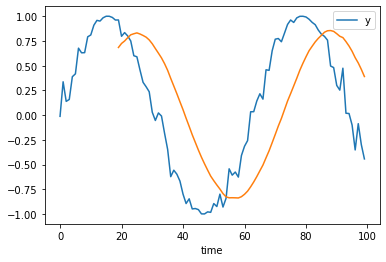

In [ ]:
# Давайте найдем скользящее среднее

df.plot(x='time', y='y')
df.rolling(window=20)['y'].mean().plot(x='time')

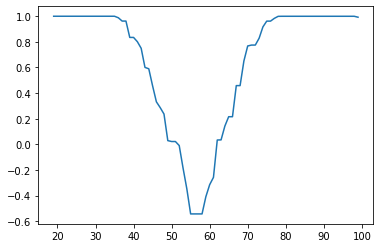

In [ ]:
# максимальное

df.rolling(window=20)['y'].max().plot(x='time')

cut и qcut

In [ ]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                      'B': ['A', 'B', 'C'] * 4,
                       'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                       'D': np.random.randn(12),
                       'E': np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-0.573060,-0.397975
1,one,B,foo,-1.475317,0.523150
2,two,C,foo,0.965468,-0.055246
3,three,A,bar,1.549562,-2.102132
4,one,B,bar,-0.115008,0.307633
5,one,C,bar,1.776090,0.974285
6,two,A,foo,-1.721593,-0.751736
7,three,B,foo,0.139878,0.709072
8,one,C,foo,-0.034025,0.165774
9,one,A,bar,2.499699,0.983633


In [ ]:
df['interval_D'] = pd.cut(df['D'], 5)
df

,A,B,C,D,E,interval_D
0,one,A,foo,-0.573060,-0.397975,"(-0.877, -0.0331]"
1,one,B,foo,-1.475317,0.523150,"(-1.726, -0.877]"
2,two,C,foo,0.965468,-0.055246,"(0.811, 1.655]"
3,three,A,bar,1.549562,-2.102132,"(0.811, 1.655]"
4,one,B,bar,-0.115008,0.307633,"(-0.877, -0.0331]"
5,one,C,bar,1.776090,0.974285,"(1.655, 2.5]"
6,two,A,foo,-1.721593,-0.751736,"(-1.726, -0.877]"
7,three,B,foo,0.139878,0.709072,"(-0.0331, 0.811]"
8,one,C,foo,-0.034025,0.165774,"(-0.877, -0.0331]"
9,one,A,bar,2.499699,0.983633,"(1.655, 2.5]"


In [ ]:
pd.cut(df['D'], 5, labels=['first', 'second', 'thrid', 'fourth', 'fifth'],)

0     second
1      first
2     fourth
3     fourth
4     second
5      fifth
6      first
7      thrid
8     second
9      fifth
10     thrid
11     thrid
Name: D, dtype: category
Categories (5, object): [first < second < thrid < fourth < fifth]

In [ ]:
pd.qcut(df['D'], [0, 0.25, 0.5, 0.75, 1.0], labels=['q1', 'q2', 'q3', 'q4'])

0     q1
1     q1
2     q3
3     q4
4     q2
5     q4
6     q1
7     q2
8     q2
9     q4
10    q3
11    q3
Name: D, dtype: category
Categories (4, object): [q1 < q2 < q3 < q4]